In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2
from CalRun import CalRun, CalPredictor, shift_vec
from tqdm.notebook import tqdm
import matplotlib

In [2]:
tcalshift = 300
dtrue = 1.
A=1.0
c= CalRun (N=120, pf=False, sky=False, cal=True, notch=True, verbose=False, drift=dtrue, A=A, 
                 calfile = "data/samples/calib_filt.txt", cal_shift = tcalshift,seed=int(A*999),force=False)
c.get_sig(tcalshift,dtrue,"data/samples/calib_filt.txt")

cache/7282a7df60c0dd69282593df80c0e1d5.pickle
max cor: 511.99964210066884


/usr/local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


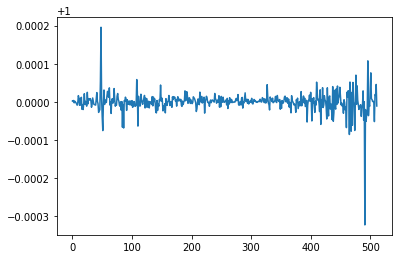

In [3]:
plt.plot(c.rbeam)           

In [4]:
#c=CalRun(N=20, sky=False, pf=False, cal=True,verbose=True, notch=False,calfile="data/samples/calib_band.txt")
#w=CalRun(N=20, sky=True, pf=False, cal=False, pkfile="data/Pk/Pk_white-22.txt", verbose=True)

In [5]:
#CalPredictor(16,0.1,c.cumdrift,"data/samples/calib_band.txt")

In [ ]:
Sk = CalRun (N=120, sky=True, pf=False, cal=False, notch=False, verbose=False)
Pf = CalRun (N=120, sky=False, pf=True, cal=False, notch=False, verbose=False)
Ca = CalRun (N=120, sky=False, pf=False, cal=True, notch=False, verbose=False)
To = CalRun (N=120, sky=True, pf=True, cal=True, notch=False, verbose=False)

cache/46b8e778549b9315ed5c73777a2436cc.pickle
cache/d3913263fbf875900cd68424330006cd.pickle
cache/7be830b1dcf36cb6ad24fa39f1820398.pickle
cache/1f3ed66ef908f3d3f4aad2155eb8d326.pickle


In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Sk.k, Sk.Pk.mean(axis=0),'r-', label='Sky + Plasma + Noise')
ax.plot(Sk.k, Pf.Pk.mean(axis=0),'g-', label='Picket fence comb')
ax.plot(Sk.k, Ca.Pk.mean(axis=0),'b-', label='Calibration comb')
ax.plot(Sk.k, To.Pk.mean(axis=0),'k:', label='Total')

ax.set_xlabel('frequency [MHz]',fontsize=14)
ax.set_ylabel('Power [$V^2/Hz$]',fontsize=14)
#ax.semilogy()
ax.loglog()
plt.legend()
plt.ylim(1e-15,1e-4)
plt.xlim(0.02,10)
plt.savefig('spec_demo0.pdf')

In [ ]:
S = CalRun (N=120, pf=True, cal=True, notch=True, verbose=False)

In [ ]:
kt,Pt = np.loadtxt('../data/Pk/Pk_wnoise.txt').T
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(S.k, S.Pk.mean(axis=0),'r.', label='Spectrometer output')
ax.plot(kt[kt>0.01],Pt[kt>0.01],'k--',label='Input model')
ax.set_xlabel('frequency [MHz]',fontsize=14)
ax.set_ylabel('Power [$V^2/Hz$]',fontsize=14)
ax.semilogy()
plt.legend()#loc=(0.06,0.83))
newax = fig.add_axes([0.235,0.50,0.45,0.34], anchor='NE', zorder=1)
newax.plot(S.k, S.Pk.mean(axis=0),'r.')
newax.plot(kt[kt>0.01],Pt[kt>0.01],'k--')
newax.set_xlim(29,31)
newax.set_ylim(0.9e-9,1.1e-9)
plt.savefig('spec_demo.pdf')

In [ ]:
S={}
for d in tqdm(np.arange(-1.4, +1.4, 0.05)):
    S[d]=CalRun (N=120, pf=True, cal=True, notch=True, verbose=False, drift=d, 
                 calfile = "data/samples/calib_filt.txt")
    S[d].get_cal()

In [ ]:
plt.figure(figsize=(8,4))
for k,val in list(S.items())[4:-3:4]:
    val.get_cal()
    plt.plot(np.hstack((val.cumdrift,0)))
    print (k,val.idrift.mean()/(40*20*4096)*1e6, val.drift_ppm)
    plt.plot([0,len(val.cumdrift)],[(800*1024*(5*val.N)*k*1e-6),0],'k:')
#plt.xlim(360,400)
#plt.ylim(200,250)
plt.ylabel('shift size [samples]')
plt.xlabel('packet number')
plt.savefig('tracking1.pdf')

In [ ]:
drift_det = np.array([[k,val.drift_ppm] for k,val in  list(S.items())[4:-3:1]])
plt.plot(drift_det[:,0],drift_det[:,1]-drift_det[:,0],'ro-')
plt.xlabel('true drift [ppm]')
plt.ylabel('drift error [ppm]')
plt.savefig('tracking2.pdf')

In [ ]:
S=[]
dbl = np.arange(0,30,1)
for db in tqdm(dbl):
    A = np.sqrt(10**(-db/10))
    S.append(CalRun (N=120, pf=True, cal=True, notch=True, verbose=False, drift=-0.7, A=A,
                 calfile = "data/samples/calib_filt.txt"))

In [ ]:
_=[s.get_cal() for s in S]

In [ ]:
plt.figure(figsize=(8,4))
cmap = matplotlib.cm.get_cmap('plasma')
for cc,(db,val) in enumerate(list(zip(dbl,S))):
    val.get_cal()
    label= f'-{db}dB' if db%5==0 else None
    plt.plot(np.hstack((val.cumdrift,0)),'.-',label=label, color=cmap(cc/30))
plt.plot([0,len(val.cumdrift)],[(800*1024*(5*val.N)*-0.7*1e-6),0],'k:')
plt.xlim(360,380)
plt.ylim(-180,-140)
plt.ylabel('shift size [samples]')
plt.xlabel('packet number')
plt.legend()
plt.savefig('tracking3.pdf')

In [ ]:
drift_det = np.array([val.drift_ppm for val in S])
plt.plot(dbl,drift_det+0.7,'ro-')
plt.semilogy()
plt.xlabel('Signal suppression to fiduciual[dB]')
plt.ylabel('drift error [ppm]')
plt.savefig('tracking4.pdf')

In [ ]:
dtrue=-0.7
tcalshift=4003
dBlist = np.arange(+20,-21,-1)
#dBlist = [+0.0]
noisy=[]
for dB in tqdm(dBlist):
    A=np.sqrt(10**(dB/10))
    C=CalRun (N=120, pf=True, sky=True, cal=True, notch=True, verbose=False, drift=dtrue, A=A, 
                 calfile = "data/samples/calib_filt.txt", cal_shift = tcalshift,seed=int(A*999))
    b=C.drift_ppm
    C.get_cal()
    print (b,C.drift_ppm)
    noisy.append(C)
    

In [ ]:
def fitanal(noisy, use_true_drift):
    result = []
    for no in noisy:
        calshift = tcalshift#2003
        seenbefore = []
        while True:
            d = dtrue if use_true_drift else no.drift_ppm
            no.get_sig(calshift,d,"data/samples/calib_filt.txt")
            calshift = int(calshift+no.cal_shift+0.5)%(2048*16)
            print ("shifting: ",no.cal_shift,calshift)
            if (no.cal_shift==0) or (calshift in seenbefore) or (len(seenbefore)>10):
                break
            seenbefore.append(calshift)
        result.append((no.A,no.rbeam))
    return result

#res_td = fitanal(noisy, True)
res_fd = fitanal(noisy, False)


#plt.plot(noisy[0].rbeam)
#use_true_drift=False
#fit

In [ ]:
def avg(v):
    return v.reshape((-1,4)).mean(axis=1)

cmap = matplotlib.cm.get_cmap('plasma')

use = 'fitted'
#use = 'true'
res = res_fd if use == 'fitted' else res_td
cf=noisy[0].cf

def plus (num):
    return "+"+str(num) if num>0 else str(num)

for cc,(A,rbeam) in enumerate(res[::-1]):
    clr = cmap(1-(cc+0.5)/len(noisy))

    if A<0.2:
        continue
    plt.plot(avg(cf),avg(np.real(rbeam)/A),lw=2, color=clr, label=plus(dBlist[::-1][cc])+" dB" if cc%10==0 else None)#-0.1*cc)
    plt.plot(avg(cf),avg(np.imag(rbeam)/A),lw=2, color=clr)#-0.1*cc)
    
#plt.semilogy()
plt.ylim(-0.4,2.5)
plt.xlim(0,50)
plt.legend(loc='upper left')
plt.xlabel('frequency [MHz]')
plt.ylabel('recovered response')
plt.savefig(f'unit_response_{use}.pdf')

In [ ]:
fdvals = [r.mean()/A for A,r in res_fd]
fderr = [np.sqrt((r/A).var()) for A,r in res_fd]
tdvals = [r.mean()/A for A,r in res_td]
tderr = [np.sqrt((r/A).var()) for A,r in res_td]

plt.errorbar(dBlist,fdvals, yerr=fderr,fmt='bo')
plt.errorbar(dBlist+0.2,tdvals,tderr,fmt='ro')
plt.axline((0,1),slope=0,ls=':',color='k')
plt.ylim(0.5,1.5)
plt.plot([],[],'ro',label='true drift')
plt.plot([],[],'bo',label='fitted drift')
plt.xlabel('signal strength [dB]')
plt.ylabel('recovery bias')
plt.legend(loc='upper left')
plt.savefig('bias-drift.pdf')

In [ ]:
data=np.array(noisy)[dBlist==20.0][0]

ml = ['filt','band','step']
res={}
for m in ml:
    calshift = 2003 
    while True:
        print (calshift)
        data.get_sig(calshift,dtrue,f"data/samples/calib_{m}.txt")
        calshift = (calshift+data.cal_shift)%(2048*16)
        if data.cal_shift == 0:
            break
    res[m] = data.rbeam


In [ ]:
label={'filt':'filtered','band':'band limited', 'step':'nearest'}
for m in ml:
    plt.plot(avg(data.cf), avg(res[m])/10, label=label[m])
#plt.ylim(0,2)
plt.legend()
plt.xlabel('frequency [MHz]')
plt.ylabel('recovered response')
plt.savefig('bias-alias.pdf')
#plt.plot(avg(data.cf), avg(res_td[0][1]/10))
#plt.ylim(-0.4,2.5)